In [28]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')

In [29]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Null values within Data:

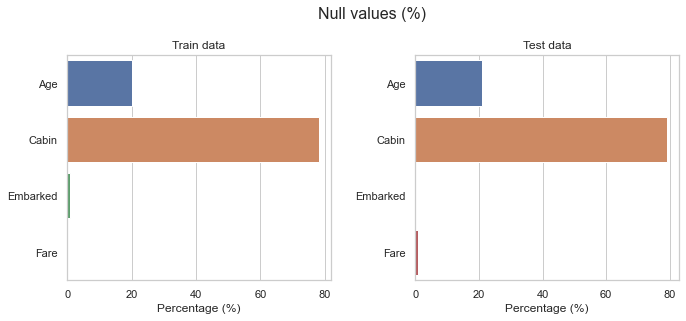

In [30]:
train_null = train_df.isnull().sum()
test_null = test_df.isnull().sum()

null_df = pd.DataFrame({'train_null':train_null,
                        'test_null':test_null})
null_df.dropna(inplace=True)  #Drop target variable (survived)

null_df['train_null_avg'] = [math.ceil((value * 100) / train_df.shape[0]) for value in null_df.train_null]
null_df['test_null_avg'] = [math.ceil((value * 100) / test_df.shape[0]) for value in null_df.test_null]
null_df = null_df[:4]

fig, ax = plt.subplots(1,2, figsize=(10,5))

# Plot Null values percentage within train data
sns.barplot(x=null_df.train_null_avg, y=null_df.index, ax=ax[0])
ax[0].set_title('Train data')
ax[0].set_xlabel('Percentage (%)')

# Plot Null values percentage within test data
sns.barplot(x=null_df.test_null_avg, y=null_df.index, ax=ax[1])
ax[1].set_title('Test data')
ax[1].set_xlabel('Percentage (%)')

fig.suptitle('Null values (%)', fontsize=16, x=.54 ,y=.92)
fig.tight_layout(pad=2)
plt.show()

- Embarked and Fare contain a low amount of null values imputing average value should suffice
- Age and Cabin need a more creative approach to imputing values maybe design a model to predict values

---

## How Gender impacted Survivability

In [36]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

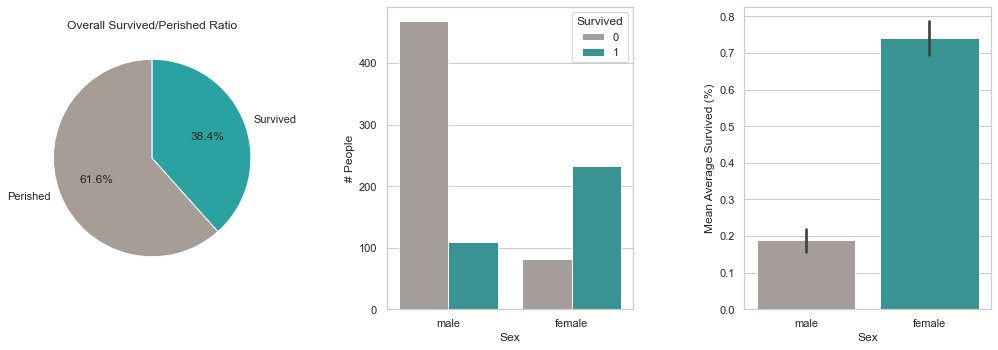

In [55]:
# Pie chart labels
survived_count = train_df.Survived.value_counts()
labels = ['Survived' if i == 1 else 'Perished' for i in survived_count.index]

colors = ['#A69D97', '#2AA2A1']

fig, ax = plt.subplots(1,3, figsize=(15,6))

# Plot pie chart of class imbalance
ax[0].pie(survived_count.values, labels=labels, startangle=90, autopct='%1.1f%%',colors=colors)
ax[0].set_title('Overall Survived/Perished Ratio')

# Plot barplot count number of people
labels = ['male', 'female']
sns.barplot(data=train_df, x='Sex', y='Survived', hue='Survived', estimator=len, palette=colors, ax=ax[1])
ax[1].set_ylabel('# People')

# Plot average survived
sns.barplot(data=train_df, x='Sex', y='Survived', estimator=np.mean, palette=colors, ax=ax[2])
ax[2].set_ylabel('Mean Average Survived (%)')



fig.tight_layout(pad=4)
plt.show()

In [56]:
(577 - 314)/314 * 100

83.7579617834395

- Slight class imbalance for target variable (more deaths than survived)
- Much more male casualties than females
- However there are 80% More males onboard than females